## Linguas I - Limpeza de dados

#### Bibliotecas e Base de Dados

In [87]:
import pandas as pd
import os
import math
from statsmodels.tsa.seasonal import STL
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score

%matplotlib inline
import matplotlib.pyplot as plt


In [88]:
## print("Esperamos trabalhar no diretório")
print(os.getcwd())


/Users/liviacarvalho/Documents/Insper Junior/Capacitação/Case I - Linguas I/LinguasI-Analise-Exploratoria


In [89]:
filename = 'base_cliente.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')
    

Parece que o arquivo base_cliente.xlsx está na mesma pasta do notebook da avaliação, yay!



In [90]:
# Carregando os dados
df = pd.read_excel(filename)
df.head()

,"ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa"
0,"0,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,58138.0,Ingles..."
1,"1,Trabalho,GraduaÃ§Ã£o,TaubatÃ©,46344.0,Espanh..."
2,"2,Estudos,graduacao,SÃ£o Bernardo,71613.0,Ingl..."
3,"3,Viagem,graduacao,SÃ£o Paulo,,Espanhol,4,22,2..."
4,"4,Trabalho,Doutorado,SÃ£o Paulo,58293.0,Ingres..."


In [91]:

# Lendo com engine openpyxl
df_raw = pd.read_excel(filename, engine="openpyxl", header=None)

# Separando os dados da única coluna em múltiplas colunas
df = df_raw[0].str.split(",", expand=True)

# Ajustando o nome das colunas (a primeira linha do df agora contém os nomes)
df.columns = df.iloc[0]
df = df[1:]

df.head(100)


,ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa
1,0,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,58138.0,Ingles,4,19,1983,3.0,4.0
2,1,Trabalho,GraduaÃ§Ã£o,TaubatÃ©,46344.0,Espanhol,4,10,1980,4.0,3.0
3,2,Estudos,graduacao,SÃ£o Bernardo,71613.0,Ingles,3,59,1991,4.0,5.0
4,3,Viagem,graduacao,SÃ£o Paulo,,Espanhol,4,22,2010,1,1.0
5,4,Trabalho,Doutorado,SÃ£o Paulo,58293.0,Ingres,3,8,2007,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
96,95,Viagem,graduacao,SÃ£o Paulo,,Espanhol,3,19,2009,1,2.0
97,96,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,47916.0,Espanhol,3,12,1986,3.0,3.0
98,97,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,51813.0,Ingles,1,15,1998,3.0,4.0
99,98,Estudos,Ensino MÃ©dio,SÃ£o Paulo,78497.0,Espanhol,1,4,1977,4.0,6.0


In [92]:
#Correção: 'Education'
df["Education"] = df["Education"].replace({
    "GraduaÃ§Ã£o": "Graduação",
    "Doutorado": "Doutorado",
    "Ensino MÃ©dio": "Ensino Médio",
    "graduacao": "Graduação" 
})

#Correção: 'Cidade'
df["Cidade"] = df["Cidade"].replace({
    "SÃ£o Paulo": "São Paulo",
    "SÃ£o Bernardo": "São Bernardo",
    "TaubatÃ©": "Taubaté"
})

#Correção: 'Aulas'
df["Aulas"] = df["Aulas"].replace({
    "Ingres": "Ingles",
})


df['Quartos_na_casa'] = df['Quartos_na_casa'].astype(float)
df['Quartos_na_casa'] = df['Quartos_na_casa'].astype('Int64')
df['Banheiros_na_casa'] = df['Banheiros_na_casa'].astype(float)
df['Banheiros_na_casa'] = df['Banheiros_na_casa'].astype('Int64')


df.head(20)


,ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa
1,0,Viagem,Graduação,São Paulo,58138.0,Ingles,4,19,1983,3,4
2,1,Trabalho,Graduação,Taubaté,46344.0,Espanhol,4,10,1980,4,3
3,2,Estudos,Graduação,São Bernardo,71613.0,Ingles,3,59,1991,4,5
4,3,Viagem,Graduação,São Paulo,,Espanhol,4,22,2010,1,1
5,4,Trabalho,Doutorado,São Paulo,58293.0,Ingles,3,8,2007,3,4
6,5,Trabalho,Mestrado,São Paulo,,Espanhol,3,9,1993,4,4
7,6,Viagem,Graduação,São Paulo,55635.0,Espanhol,4,12,1997,2,4
8,7,Estudos,Doutorado,Campinas,33454.0,Ingles,3,45,2011,2,2
9,8,Trabalho,Doutorado,São Paulo,30351.0,Ingles,4,45,2000,1,2
10,9,Trabalho,Doutorado,São Bernardo,5648.0,Ingles,5,12,1976,1,1


#### Visão Macro

In [93]:
# Visão macro
resumo_estatistico = df.describe(include='all')
print("Resumo Estatístico:")
print(resumo_estatistico)

# Tipos de dados por coluna
print("\nTipos de Dados:")
print(df.dtypes)

Resumo Estatístico:
0      ID_Cliente    Motivo  Education     Cidade Renda_anual   Aulas   NPS  \
count        2240      2240       2240       2240        2240    2240  2240   
unique       2240         4          5          5        1709       4     5   
top             0  Trabalho  Graduação  São Paulo              Ingles     3   
freq            1       896       1127       1567         339    1008   652   
mean          NaN       NaN        NaN        NaN         NaN     NaN   NaN   
std           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
min           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
25%           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
50%           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
75%           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
max           NaN       NaN        NaN        NaN         NaN     NaN   NaN   

0      Num_Aulas Ano_de_nascime

In [94]:
# Contagem de valores únicos por coluna - OUTLIERS!!!!!!
print("\nQuantidade de Valores Únicos por Coluna:")
print(df.nunique().sort_values(ascending=False))

print("\nFormato do DataFrame:")
print(f"{df.shape[0]} linhas × {df.shape[1]} colunasg")


Quantidade de Valores Únicos por Coluna:
0
ID_Cliente           2240
Renda_anual          1709
Num_Aulas              82
Ano_de_nascimento      59
Quartos_na_casa         6
Education               5
Cidade                  5
NPS                     5
Banheiros_na_casa       5
Motivo                  4
Aulas                   4
dtype: int64

Formato do DataFrame:
2240 linhas × 11 colunasg


In [95]:
for coluna in df.columns:
    if coluna != "ID_Cliente":
        print(f"\nDistribuição de valores únicos na coluna: {coluna}")
        print(df[coluna].value_counts(dropna=False))



Distribuição de valores únicos na coluna: Motivo
Motivo
Trabalho    896
Estudos     784
Viagem      448
            112
Name: count, dtype: int64

Distribuição de valores únicos na coluna: Education
Education
Graduação             1127
Doutorado              486
Mestrado               370
Ensino Médio           203
Ensino Fundamental      54
Name: count, dtype: int64

Distribuição de valores únicos na coluna: Cidade
Cidade
São Paulo       1567
São Bernardo     326
Campinas         231
Taubaté           68
Rio Branco        48
Name: count, dtype: int64

Distribuição de valores únicos na coluna: Renda_anual
Renda_anual
                     339
52247.25135379061     20
7500.0                10
83844.0                3
63841.0                3
                    ... 
78285.0                1
35523.0                1
38829.0                1
58512.0                1
69245.0                1
Name: count, Length: 1709, dtype: int64

Distribuição de valores únicos na coluna: Aulas
Aulas
Ingl

### Outliers

Total de registros com ao menos 1 outlier: 133

Exemplo de registros com múltiplos outliers:
0    ID_Cliente    Motivo  Education        Cidade  Renda_anual     Aulas NPS  \
165         164   Estudos  Doutorado     São Paulo     157243.0  Mandarim   5   
340         339  Trabalho  Doutorado     São Paulo      83532.0  Mandarim   4   
3             2   Estudos  Graduação  São Bernardo      71613.0    Ingles   3   
1396       1395  Trabalho   Mestrado  São Bernardo          NaN  Mandarim   4   
1335       1334  Trabalho   Mestrado       Taubaté      88097.0  Mandarim   5   

0     Num_Aulas  Ano_de_nascimento  Banheiros_na_casa  Quartos_na_casa  \
165          91               1999                  4                6   
340          85               1925                  4                6   
3            59               1991                  4                5   
1396         90               1982                  4                5   
1335         77               2004                

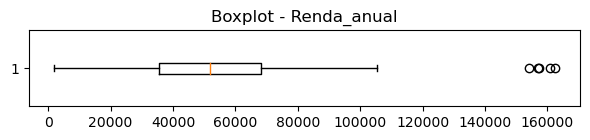

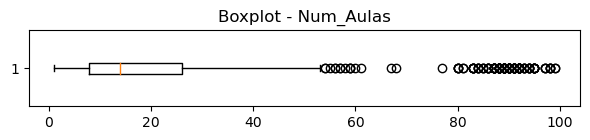

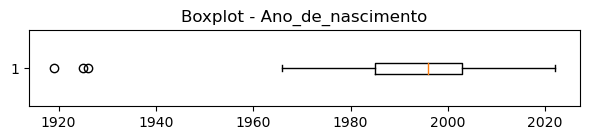

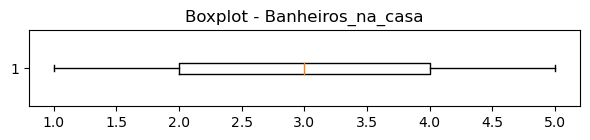

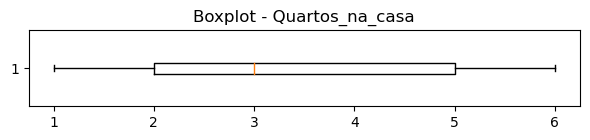

In [96]:
# # Garantir que Renda_anual esteja numérica (após imputação direta)
# df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")

# # Selecionar todas as variáveis numéricas
# variaveis_numericas = df.select_dtypes(include=["float64", "int64", "Int64"]).columns

# # Inicializar DataFrame de flags de outliers
# outlier_flags = pd.DataFrame(index=df.index)

# # Detectar outliers via IQR para cada variável numérica
# for coluna in variaveis_numericas:
#     Q1 = df[coluna].quantile(0.25)
#     Q3 = df[coluna].quantile(0.75)
#     IQR = Q3 - Q1
#     limite_inferior = Q1 - 1.5 * IQR
#     limite_superior = Q3 + 1.5 * IQR
#     outlier_flags[coluna + "_outlier"] = (
#         (df[coluna] < limite_inferior) | (df[coluna] > limite_superior)
#     )

# # Contar quantas variáveis cada linha foi marcada como outlier
# outlier_flags["total_outlier_flags"] = outlier_flags.sum(axis=1)

# # Gerar base de registros com ao menos 1 outlier
# df_outliers = df[outlier_flags["total_outlier_flags"] > 0].copy()
# df_outliers["qtd_outliers"] = outlier_flags["total_outlier_flags"]

# # Output geral
# print(f"Total de registros com ao menos 1 outlier: {len(df_outliers)}")
# print("\nExemplo de registros com múltiplos outliers:")
# print(df_outliers.sort_values("qtd_outliers", ascending=False).head())

# # Verificar especificamente outliers em Num_Aulas
# if "Num_Aulas_outlier" in outlier_flags.columns:
#     num_aulas_outliers = df[outlier_flags["Num_Aulas_outlier"]]
#     print(f"\nTotal de outliers em 'Num_Aulas': {len(num_aulas_outliers)}")
#     print(num_aulas_outliers[["ID_Cliente", "Num_Aulas", "Renda_anual"]].head())

# # Garantir que 'Num_Aulas' está como numérica
# df["Num_Aulas"] = pd.to_numeric(df["Num_Aulas"], errors="coerce")

# # Atualizar lista de variáveis numéricas
# variaveis_numericas = df.select_dtypes(include=["float64", "int64", "Int64"]).columns

# # Boxplot para todas as variáveis numéricas, incluindo Num_Aulas
# for coluna in variaveis_numericas:
#     plt.figure(figsize=(6, 1.5))
#     plt.boxplot(df[coluna].dropna(), vert=False)
#     plt.title(f"Boxplot - {coluna}")
#     plt.tight_layout()
#     plt.show()

# # Garantir que as colunas estão numéricas
# df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")
# df["Num_Aulas"] = pd.to_numeric(df["Num_Aulas"], errors="coerce")

# # Atualizar lista de variáveis numéricas
# variaveis_numericas = df.select_dtypes(include=["float64", "int64", "Int64"]).columns

# # Inicializar flags de outliers
# outlier_flags = pd.DataFrame(index=df.index)

# # Detectar outliers por IQR
# for coluna in variaveis_numericas:
#     Q1 = df[coluna].quantile(0.25)
#     Q3 = df[coluna].quantile(0.75)
#     IQR = Q3 - Q1
#     limite_inferior = Q1 - 1.5 * IQR
#     limite_superior = Q3 + 1.5 * IQR
#     outlier_flags[coluna + "_outlier"] = (
#         (df[coluna] < limite_inferior) | (df[coluna] > limite_superior)
#     )

# # Contar quantas variáveis com outlier por linha
# outlier_flags["total_outlier_flags"] = outlier_flags.sum(axis=1)

# # Base com outliers
# df_outliers = df[outlier_flags["total_outlier_flags"] > 0].copy()
# df_outliers["qtd_outliers"] = outlier_flags["total_outlier_flags"]

# # Resultados
# print(f"Total de registros com ao menos 1 outlier: {len(df_outliers)}")
# print("\nExemplo de registros com múltiplos outliers:")
# print(df_outliers.sort_values("qtd_outliers", ascending=False).head())

# # Verificar especificamente outliers de Num_Aulas
# if "Num_Aulas_outlier" in outlier_flags.columns:
#     num_aulas_outliers = df[outlier_flags["Num_Aulas_outlier"]]
#     print(f"\nTotal de outliers em 'Num_Aulas': {len(num_aulas_outliers)}")
#     print(num_aulas_outliers[["ID_Cliente", "Num_Aulas", "Renda_anual"]].head())

# # Boxplots atualizados
# for coluna in variaveis_numericas:
#     plt.figure(figsize=(6, 1.5))
#     plt.boxplot(df[coluna].dropna(), vert=False)
#     plt.title(f"Boxplot - {coluna}")
#     plt.tight_layout()
#     plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que as colunas estão numéricas (inclusive Ano_de_nascimento)
df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")
df["Num_Aulas"] = pd.to_numeric(df["Num_Aulas"], errors="coerce")
df["Ano_de_nascimento"] = pd.to_numeric(df["Ano_de_nascimento"], errors="coerce")

# Atualizar lista de variáveis numéricas
variaveis_numericas = df.select_dtypes(include=["float64", "int64", "Int64"]).columns

# Inicializar flags de outliers
outlier_flags = pd.DataFrame(index=df.index)

# Detectar outliers por IQR para cada variável numérica
for coluna in variaveis_numericas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outlier_flags[coluna + "_outlier"] = (
        (df[coluna] < limite_inferior) | (df[coluna] > limite_superior)
    )

# Contar quantas variáveis com outlier por linha
outlier_flags["total_outlier_flags"] = outlier_flags.sum(axis=1)

# Base com outliers
df_outliers = df[outlier_flags["total_outlier_flags"] > 0].copy()
df_outliers["qtd_outliers"] = outlier_flags["total_outlier_flags"]

# Resultados
print(f"Total de registros com ao menos 1 outlier: {len(df_outliers)}")
print("\nExemplo de registros com múltiplos outliers:")
print(df_outliers.sort_values("qtd_outliers", ascending=False).head())

# Verificar especificamente outliers de Num_Aulas
if "Num_Aulas_outlier" in outlier_flags.columns:
    num_aulas_outliers = df[outlier_flags["Num_Aulas_outlier"]]
    print(f"\nTotal de outliers em 'Num_Aulas': {len(num_aulas_outliers)}")
    print(num_aulas_outliers[["ID_Cliente", "Num_Aulas", "Renda_anual"]].head())

# Boxplots atualizados
for coluna in variaveis_numericas:
    plt.figure(figsize=(6, 1.5))
    plt.boxplot(df[coluna].dropna(), vert=False)
    plt.title(f"Boxplot - {coluna}")
    plt.tight_layout()
    plt.show()


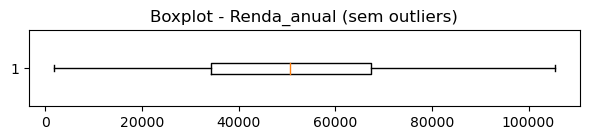

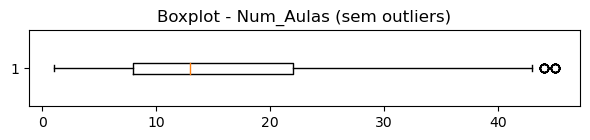

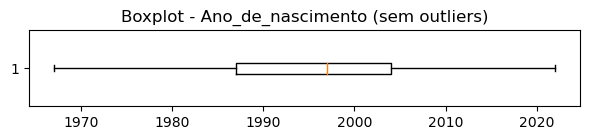

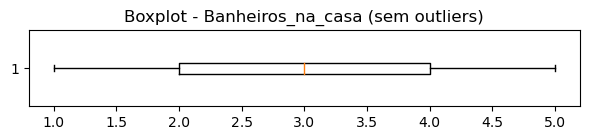

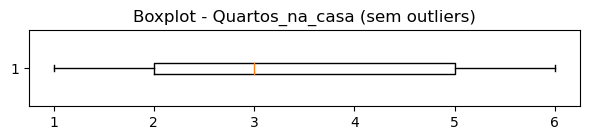

In [97]:
# Criar novo DataFrame sem nenhum outlier
# Substitui df original pela versão sem outliers
import pandas as pd
import matplotlib.pyplot as plt

# Remover registros com qualquer outlier detectado previamente
df = df[outlier_flags["total_outlier_flags"] == 0].copy()

# Garantir que as colunas estão numéricas
df["Num_Aulas"] = pd.to_numeric(df["Num_Aulas"], errors="coerce")
df["Ano_de_nascimento"] = pd.to_numeric(df["Ano_de_nascimento"], errors="coerce")

# Remover outliers de Num_Aulas (via IQR)
Q1_na = df["Num_Aulas"].quantile(0.25)
Q3_na = df["Num_Aulas"].quantile(0.75)
IQR_na = Q3_na - Q1_na
limite_inferior_na = Q1_na - 1.5 * IQR_na
limite_superior_na = Q3_na + 1.5 * IQR_na
df = df[(df["Num_Aulas"] >= limite_inferior_na) & (df["Num_Aulas"] <= limite_superior_na)].copy()

# Remover outliers de Ano_de_nascimento (via IQR)
Q1_ano = df["Ano_de_nascimento"].quantile(0.25)
Q3_ano = df["Ano_de_nascimento"].quantile(0.75)
IQR_ano = Q3_ano - Q1_ano
limite_inferior_ano = Q1_ano - 1.5 * IQR_ano
limite_superior_ano = Q3_ano + 1.5 * IQR_ano
df = df[(df["Ano_de_nascimento"] >= limite_inferior_ano) & (df["Ano_de_nascimento"] <= limite_superior_ano)].copy()

# Atualizar variáveis numéricas após todas as remoções
variaveis_numericas_sem_outlier = df.select_dtypes(include=["float64", "int64", "Int64"]).columns

# Gerar boxplot para cada variável numérica (sem outliers)
for coluna in variaveis_numericas_sem_outlier:
    plt.figure(figsize=(6, 1.5))
    plt.boxplot(df[coluna].dropna(), vert=False)
    plt.title(f"Boxplot - {coluna} (sem outliers)")
    plt.tight_layout()
    plt.show()


### Valores Faltantes

In [98]:
#strings vazias ou espaços por NaN
df.replace(["", " ", "  ", "   "], np.nan, inplace=True)

faltantes = df.isnull().sum()
faltantes_percentual = (faltantes / len(df)) * 100

# Filtrando apenas os que têm dados ausentes
faltantes = faltantes[faltantes > 0]
faltantes_percentual = faltantes_percentual[faltantes_percentual > 0]

print("VALORES FALTANTES:")
print(faltantes)

print("\nPERCENTUAL POR COLUNA:")
print(faltantes_percentual)


VALORES FALTANTES:
0
Motivo         104
Renda_anual    311
dtype: int64

PERCENTUAL POR COLUNA:
0
Motivo          5.036320
Renda_anual    15.060533
dtype: float64


#### Variável Motivos 

In [99]:
#Em relacão as variáveis motivo e renda:
# Criando variáveis booleanas para indicar ausência
df["motivo_na"] = df["Motivo"].isnull()
df["renda_na"] = df["Renda_anual"].isnull()

# Tabela cruzada das ausências
tabela_cruzada = pd.crosstab(df["motivo_na"], df["renda_na"])

print("Tabela cruzada de valores ausentes (Motivo x Renda_anual):")
print(tabela_cruzada)

print("\nProporção de ausência de renda dentro dos que têm e não têm motivo:")
print(tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0))


Tabela cruzada de valores ausentes (Motivo x Renda_anual):
renda_na   False  True 
motivo_na              
False       1659    302
True          95      9

Proporção de ausência de renda dentro dos que têm e não têm motivo:
renda_na      False     True 
motivo_na                    
False      0.845997  0.154003
True       0.913462  0.086538


In [100]:
# Filtrar somente linhas com motivo ausente
nulos_por_aula = df[df["Motivo"].isnull()]["Aulas"].value_counts()

print("Contagem de valores nulos em 'Motivo' por tipo de 'Aulas':")
print(nulos_por_aula)

Contagem de valores nulos em 'Motivo' por tipo de 'Aulas':
Aulas
Espanhol             58
Ingles               36
Espanhol e Ingles    10
Name: count, dtype: int64


In [101]:
#MOTIVO: COMPLETAMENTE AO ACASO (MCAR)
#    -duvida: usar moda ou colocar proporcinalmente?

# # Com a moda
# df["Motivo"].fillna(df["Motivo"].mode()[0], inplace=True)


# # Com proporção
# proporcoes = df["Motivo"].value_counts(normalize=True)
# num_nulos = df["Motivo"].isnull().sum()
# preenchimento = np.random.choice(proporcoes.index, size=num_nulos, p=proporcoes.values)
# df.loc[df["Motivo"].isnull(), "Motivo"] = preenchimento


# print("Distribuição da variável 'Motivo' após o preenchimento:")
# print(df["Motivo"].value_counts())

# Criar uma cópia para segurança (opcional)
df_copy = df.copy()

# Iterar sobre cada tipo de aula
for aula in df_copy["Aulas"].unique():
    # Filtrar apenas o grupo com essa aula
    grupo = df_copy[df_copy["Aulas"] == aula]
    
    # Distribuição original de 'Motivo' (excluindo nulos)
    distribuicao = grupo["Motivo"].value_counts(normalize=True)
    
    # Quantos valores nulos existem neste grupo
    n_nulos = grupo["Motivo"].isnull().sum()
    
    # Gerar os preenchimentos com base na distribuição
    preenchimento = np.random.choice(distribuicao.index, size=n_nulos, p=distribuicao.values)
    
    # Aplicar o preenchimento nos índices corretos
    indices_nulos = grupo[grupo["Motivo"].isnull()].index
    df_copy.loc[indices_nulos, "Motivo"] = preenchimento

df["Motivo"] = df_copy["Motivo"]

print(df["Motivo"].isnull().sum())  
print(df["Motivo"].value_counts())  # Nova distribuição geral




0
Motivo
Trabalho    822
Estudos     794
Viagem      449
Name: count, dtype: int64


Valores ausentes da variável Motivo: análise que identificou variação na proporção de nulos entre os tipos de Aulas, indicando que os dados estavam condicionadamente ao acaso (MAR). Por isso, foi aplicado uma imputação proporcional dentro de cada grupo de Aulas, preservando a distribuição original da variável em cada categoria. Essa abordagem garante maior fidelidade estatística, evita viés nas análises futuras e segue boas práticas para tratamento de dados MAR.
A imputação proporcional preserva as características reais da base, respeita a lógica estatística dos dados condicionalmente ausentes (MAR) e evita distorções nas análises futuras. Além de que o cliente mencionou que muitas vezes ele apenas "Esquecia" de anotar certas coisas.

#### Variável Renda

In [102]:
#Em relação a variável renda: relação com numero de banheiros e de quartos

df["renda_na"] = df["Renda_anual"].isnull()

# Tabela cruzada para Banheiros
print("Ausência de Renda por número de Banheiros:")
print(
    df.groupby("Banheiros_na_casa")["renda_na"]
      .mean()
      .sort_index()
      .round(4)
)

# Tabela cruzada para Quartos
print("\nProporção de ausência de Renda por número de Quartos:")
print(
    df.groupby("Quartos_na_casa")["renda_na"]
      .mean()
      .sort_index()
      .round(4)
)


Ausência de Renda por número de Banheiros:
Banheiros_na_casa
1    0.1553
2    0.1494
3    0.1366
4    0.1476
5    0.1654
Name: renda_na, dtype: float64

Proporção de ausência de Renda por número de Quartos:
Quartos_na_casa
1    0.1499
2    0.1545
3    0.1471
4    0.1329
5    0.1606
6    0.1589
Name: renda_na, dtype: float64


In [103]:

# garantir que Renda_anual seja numérica
df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")

# Criação da coluna de ausência de renda
df["renda_na"] = df["Renda_anual"].isnull()

#  variável combinada de quartos e banheiros
df["Quartos_Banheiros"] = (
    df["Quartos_na_casa"].astype(str) + "Q_" + df["Banheiros_na_casa"].astype(str) + "B"
)

# Renda média por combinação 
media_renda = (
    df.groupby("Quartos_Banheiros")["Renda_anual"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)
print("Renda média por Quartos_Banheiros:")
print(media_renda)

Renda média por Quartos_Banheiros:
Quartos_Banheiros
6Q_5B    81878.73
6Q_4B    81172.10
5Q_5B    71313.53
5Q_4B    67759.13
5Q_3B    66986.46
4Q_5B    60937.09
4Q_4B    59899.77
4Q_3B    55655.66
4Q_2B    55118.71
1Q_3B    52247.25
3Q_4B    48016.71
3Q_3B    47524.70
3Q_2B    43110.81
3Q_1B    41866.00
2Q_2B    36032.30
2Q_3B    35617.00
2Q_1B    32746.94
1Q_2B    21828.50
1Q_1B    21397.26
Name: Renda_anual, dtype: float64


In [104]:
# Proporção de ausência de renda por combinação
ausencia_renda = (
    df.groupby("Quartos_Banheiros")["renda_na"]
    .mean()
    .sort_values(ascending=False)
    .round(4)
)
print("\nProporção de ausência de renda por Quartos_Banheiros:")
print(ausencia_renda)



Proporção de ausência de renda por Quartos_Banheiros:
Quartos_Banheiros
2Q_1B    0.1818
5Q_4B    0.1721
5Q_5B    0.1705
6Q_5B    0.1643
3Q_2B    0.1570
4Q_5B    0.1538
1Q_1B    0.1529
4Q_2B    0.1500
3Q_4B    0.1500
3Q_3B    0.1497
2Q_2B    0.1489
4Q_3B    0.1429
1Q_3B    0.1429
1Q_2B    0.1282
6Q_4B    0.1143
4Q_4B    0.1138
2Q_3B    0.0909
5Q_3B    0.0370
3Q_1B    0.0000
Name: renda_na, dtype: float64


Renda média cresce com mais quartos e banheiros - confirma uma associação positiva entre estrutura da moradia e renda; Ausência de renda também varia por perfil domiciliar -> combinações com alta renda média apresentam baixa ausência de renda, mas já outras, como 5Q_5B, têm alta renda média mas também alta ausência de renda.

Isso pode sugerir que mesmo perfis de alto padrão podem estar mais sujeitos a inconsistências cadastrais, ou que a variável renda não foi preenchida mesmo em perfis ricos.

In [105]:
# Converter para número (forçando erros a NaN, se houver)
df["Ano_de_nascimento"] = pd.to_numeric(df["Ano_de_nascimento"], errors="coerce")

# Agora sim, criamos as faixas de idade
df["faixa_idade"] = pd.cut(df["Ano_de_nascimento"],
                           bins=[1900, 1979, 1989, 1999, 2009, 2025],
                           labels=["<1980", "1980s", "1990s", "2000s", "2010s"])

# E mostramos a proporção de ausência de renda por faixa etária
print("\n Ausência de Renda por Faixa de Ano de Nascimento:")
print(df.groupby("faixa_idade")["renda_na"].mean().round(4))

# Proporção de ausência de renda por Cidade
print("\nAusência de Renda por Cidade:")
print(df.groupby("Cidade")["renda_na"].mean().round(4))

# Proporção de ausência de renda por Educação
print("\nAusência de Renda por Educação:")
print(df.groupby("Education")["renda_na"].mean().round(4))



 Ausência de Renda por Faixa de Ano de Nascimento:
faixa_idade
<1980    0.1388
1980s    0.1756
1990s    0.1465
2000s    0.1449
2010s    0.1429
Name: renda_na, dtype: float64

Ausência de Renda por Cidade:
Cidade
Campinas        0.1379
Rio Branco      0.1277
São Bernardo    0.1595
São Paulo       0.1522
Taubaté         0.1290
Name: renda_na, dtype: float64

Ausência de Renda por Educação:
Education
Doutorado             0.1404
Ensino Fundamental    0.1481
Ensino Médio          0.1465
Graduação             0.1539
Mestrado              0.1551
Name: renda_na, dtype: float64


In [106]:

df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")
df["Ano_de_nascimento"] = pd.to_numeric(df["Ano_de_nascimento"], errors="coerce")

df["renda_na"] = df["Renda_anual"].isnull()

# faixas de idade
df["faixa_idade"] = pd.cut(df["Ano_de_nascimento"],
                           bins=[1900, 1979, 1989, 1999, 2009, 2025],
                           labels=["<1980", "1980s", "1990s", "2000s", "2010s"])

# apenas registros com Renda válida
df_validos = df[df["Renda_anual"].notnull()]

# Renda média por grupo
print("Renda média por Faixa Etária:")
print(df_validos.groupby("faixa_idade")["Renda_anual"].mean().round(2))

print("\nRenda média por Cidade:")
print(df_validos.groupby("Cidade")["Renda_anual"].mean().round(2))

print("\nRenda média por Escolaridade:")
print(df_validos.groupby("Education")["Renda_anual"].mean().round(2))



Renda média por Faixa Etária:
faixa_idade
<1980    58004.71
1980s    56087.42
1990s    50170.21
2000s    47855.92
2010s    44352.94
Name: Renda_anual, dtype: float64

Renda média por Cidade:
Cidade
Campinas        52113.67
Rio Branco      50425.10
São Bernardo    51086.05
São Paulo       50650.21
Taubaté         47585.78
Name: Renda_anual, dtype: float64

Renda média por Escolaridade:
Education
Doutorado             54245.68
Ensino Fundamental    20575.78
Ensino Médio          46726.16
Graduação             51736.93
Mestrado              50633.13
Name: Renda_anual, dtype: float64


In [107]:
df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")
df_renda = df[df["Renda_anual"].notnull()].copy()

df_corr = df_renda[["Renda_anual", "Ano_de_nascimento", "Quartos_na_casa", "Banheiros_na_casa"]].copy()
df_corr = df_corr.join(pd.get_dummies(df_renda["Education"], prefix="Edu"))
df_corr = df_corr.join(pd.get_dummies(df_renda["Cidade"], prefix="Cid"))

#correlação com Renda_anual
correlacoes = df_corr.corr(numeric_only=True)["Renda_anual"].drop("Renda_anual").sort_values(ascending=False)

print("Correlação das variáveis com Renda Anual (dados não nulos):")
print(correlacoes.round(4))


Correlação das variáveis com Renda Anual (dados não nulos):
Quartos_na_casa           0.9661
Banheiros_na_casa         0.9294
Edu_Doutorado             0.0836
Edu_Graduação             0.0504
Cid_Campinas              0.0219
Cid_São Bernardo          0.0065
Cid_Rio Branco           -0.0025
Edu_Mestrado             -0.0026
Cid_São Paulo            -0.0081
Cid_Taubaté              -0.0275
Edu_Ensino Médio         -0.0640
Ano_de_nascimento        -0.2068
Edu_Ensino Fundamental   -0.2408
Name: Renda_anual, dtype: float64


Ausência de dados: Verificacao ausência de Renda_anual por idade, cidade, educação, quartos e banheiros;
Identificacao de que a ausência de renda é razoavelmente homogênea, com leve concentração entre os mestrandos e faixa de 1980s.
Correlação das variáveis com Renda_anual (dummies): Apesar das correlações serem fracas, foi quantificado a força de associação entre atributos categóricos e renda

Árvore de Decisão Regressora: técnica permite estimar a renda com base em padrões observados entre múltiplas variáveis explicativas, como idade, número de quartos e banheiros, escolaridade, cidade, motivo das aulas, entre outras. O modelo utilizado — uma árvore de decisão — é capaz de capturar relações não lineares e interações complexas entre as variáveis, ajustando-se aos dados disponíveis com maior flexibilidade. Ao treinar o modelo apenas com registros que possuem a renda conhecida, ele aprende os perfis que influenciam esse valor e, posteriormente, aplica esse conhecimento para estimar os casos em que a renda está ausente. 

robusta para estimar valores numéricos faltantes com base em múltiplas variáveis explicativas, sem exigir suposições lineares ou distribuição normal dos dados

##### Regressao por arvore de decisao 

In [108]:
# Garantir os tipos corretos
df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")
df["Ano_de_nascimento"] = pd.to_numeric(df["Ano_de_nascimento"], errors="coerce")
df["Banheiros_na_casa"] = pd.to_numeric(df["Banheiros_na_casa"], errors="coerce")
df["Quartos_na_casa"] = pd.to_numeric(df["Quartos_na_casa"], errors="coerce")

# Selecionar apenas registros com renda conhecida
df_full = df[df["Renda_anual"].notnull()].copy()

# Definir variáveis explicativas
features = [
    "Ano_de_nascimento",
    "Banheiros_na_casa",
    "Quartos_na_casa",
    "Education",
    "Cidade",
    "Motivo",
    "Num_Aulas",
    "NPS",
    "Aulas"
]

# Separar X e y
X = df_full[features]
y = df_full["Renda_anual"]

# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento com dummies automáticos
categorical_cols = ["Education", "Cidade", "Motivo", "Aulas"]
numerical_cols = ["Ano_de_nascimento", "Banheiros_na_casa", "Quartos_na_casa", "Num_Aulas", "NPS"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", SimpleImputer(strategy="median"), numerical_cols)
])

# Pipeline com árvore de decisão regressora
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", DecisionTreeRegressor(max_depth=6, random_state=42))
])

# Treinar com o conjunto de treino
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar desempenho
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Avaliação do Modelo (dados de teste):")
print(f"Erro absoluto médio (MAE): {mae:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.4f}")



Avaliação do Modelo (dados de teste):
Erro absoluto médio (MAE): 3280.26
Coeficiente de determinação (R²): 0.9491


Interpretação esperada:
MAE deve estar em torno de ~3.000 a ~7.000 para um modelo razoável (renda média ≈ 50 mil).
R² acima de 0.4 já indica que o modelo está captando parte considerável da variabilidade — se estiver muito próximo de 1 e o erro for alto, pode indicar overfitting.
max_depth=6 já ajuda a conter o overfitting, mas você pode ajustar isso.


In [109]:
# # Previsao dos valores ausentes com base no modelo treinado
# df_null = df[df["Renda_anual"].isnull()].copy()
# X_null = df_null[features]
# predicted_values = model.predict(X_null)

# df.loc[df["Renda_anual"].isnull(), "Renda_anual"] = predicted_values

# print(f"Total imputado: {len(predicted_values)}")
# print(f"Valores ausentes restantes: {df['Renda_anual'].isnull().sum()}")


# df.head()



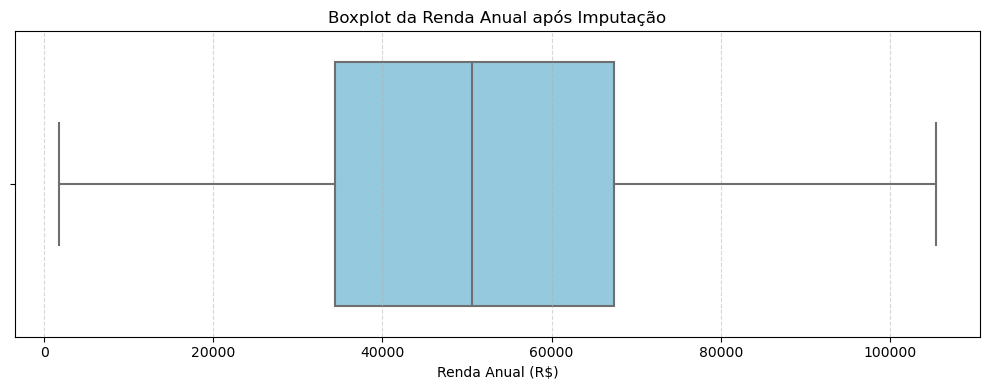

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que a coluna esteja numérica
df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")

# Criar boxplot da distribuição final da renda
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["Renda_anual"], color="skyblue")
plt.title("Boxplot da Renda Anual após Imputação")
plt.xlabel("Renda Anual (R$)")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


#### Regressao Linear

In [111]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, r2_score

# # Carregar base final tratada (substitua pelo caminho correto se necessário)
# # df = pd.read_csv("base_tratada.csv")  # Descomente se estiver usando arquivo

# # Filtrar apenas as linhas com Renda_anual conhecida
# df_reg = df[df["Renda_anual"].notnull()].copy()

# # Variáveis preditoras (numéricas + dummies categóricas)
# features_numericas = ["Ano_de_nascimento", "Banheiros_na_casa", "Quartos_na_casa", "Num_Aulas"]
# dummies_categoricas = pd.get_dummies(df_reg[["Motivo", "Education", "Cidade"]], drop_first=True)
# X = pd.concat([df_reg[features_numericas], dummies_categoricas], axis=1)
# y = df_reg["Renda_anual"]

# # Dividir entre treino e teste (80/20)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Treinar modelo de Regressão Linear
# modelo_linear = LinearRegression()
# modelo_linear.fit(X_train, y_train)

# # Prever nos dados de teste
# y_pred = modelo_linear.predict(X_test)

# # Avaliar desempenho do modelo
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Avaliação do Modelo Linear (dados de teste):")
# print(f"Erro absoluto médio (MAE): {mae:.2f}")
# print(f"Coeficiente de determinação (R²): {r2:.4f}")


Avaliação do Modelo Linear (dados de teste):
Erro absoluto médio (MAE): 3215.59
Coeficiente de determinação (R²): 0.9502


Avaliação do Modelo Linear (dados de teste):
Erro absoluto médio (MAE): 3147.22
Coeficiente de determinação (R²): 0.9462

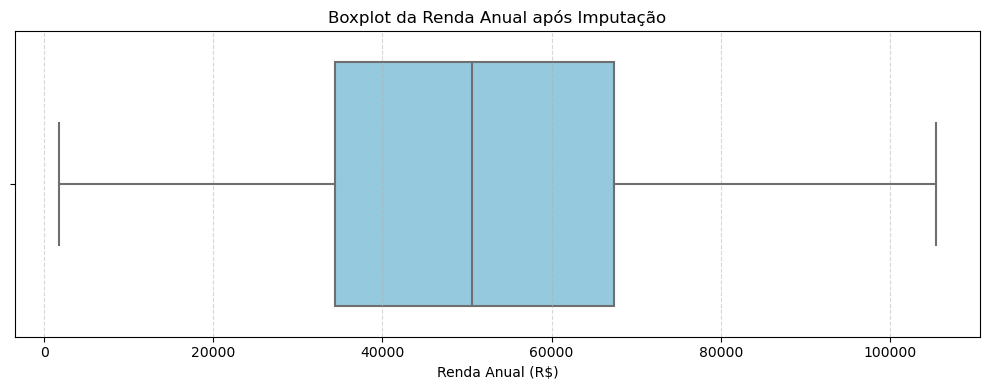

In [112]:

# boxplot da distribuição final da renda
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["Renda_anual"], color="skyblue")
plt.title("Boxplot da Renda Anual após Imputação")
plt.xlabel("Renda Anual (R$)")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### DataFrame Final

In [113]:

df.to_csv("base_tratada_lingualab.csv", index=False)

### DataFrame Final com outliers 

In [115]:
# (baseado no IQR da variável antes do filtro)
Q1 = df["Num_Aulas"].quantile(0.25)
Q3 = df["Num_Aulas"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Passo 3: Identificar os registros com outliers de Num_Aulas
df_outliers_na = df[
    (df["Num_Aulas"] < limite_inferior) | (df["Num_Aulas"] > limite_superior)
]

# Passo 4: Recriar o DataFrame original incluindo novamente esses outliers
df_sem_outliers_na = df[
    (df["Num_Aulas"] >= limite_inferior) & (df["Num_Aulas"] <= limite_superior)
]

df_com_outliers = pd.concat([df_sem_outliers_na, df_outliers_na], ignore_index=True)

# (Opcional) Remover duplicatas caso tenha reaplicado em cima do mesmo df
df_com_outliers = df_com_outliers.drop_duplicates()

# Resultado
print(f"Tamanho df sem outliers de Num_Aulas: {len(df_sem_outliers_na)}")
print(f"Tamanho dos outliers de Num_Aulas reinseridos: {len(df_outliers_na)}")
print(f"Tamanho final de df_com_outliers: {len(df_com_outliers)}")

Tamanho df sem outliers de Num_Aulas: 2041
Tamanho dos outliers de Num_Aulas reinseridos: 24
Tamanho final de df_com_outliers: 2065


In [116]:
df_com_outliers.to_csv("base_tratada_lingualab2.csv", index=False)